In [95]:
import numpy as np
import pandas as pd

In [96]:
import os
for dirname, _, filenames in os.walk('/content/train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

%matplotlib inline
%config IPCompleter.greedy=True

In [99]:
text = pd.read_csv('/content/train.csv')

In [100]:
display(text.head())

,id,tweet,label
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT
1,92152,I now have over 6k followers. Only 94k to go ...,NOT
2,65475,@USER Tom was bought! He is more interested in...,NOT
3,22144,@USER @USER Even her brother thinks she is a m...,OFF
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF


In [101]:
display(text.describe())

,id
count,12313.000000
mean,54937.978640
std,26079.349786
min,10006.000000
25%,32275.000000
50%,54953.000000
75%,77777.000000
max,99986.000000


In [102]:
print(text.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12313 entries, 0 to 12312
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      12313 non-null  int64 
 1   tweet   12313 non-null  object
 2   label   12313 non-null  object
dtypes: int64(1), object(2)
memory usage: 288.7+ KB
None


In [103]:
print(text['label'].value_counts())
print()

NOT    8221
OFF    4092
Name: label, dtype: int64



In [104]:
print(text['label'].value_counts(normalize=True))

NOT    0.667668
OFF    0.332332
Name: label, dtype: float64


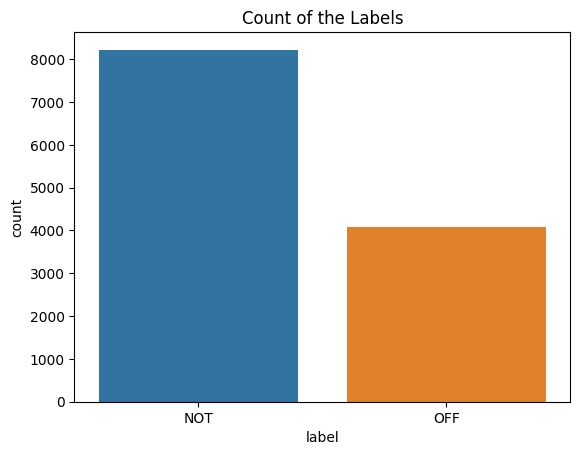

In [105]:
sns.countplot(x ='label', data = text)
plt.title("Count of the Labels")
plt.show()

In [106]:
lab_enc = LabelEncoder()
text['label_enc'] = lab_enc.fit_transform(text['label'])
display(text.head())
print(text.dtypes)

,id,tweet,label,label_enc
0,42884,@USER I’m done with you as well. An INTENTIONA...,NOT,0
1,92152,I now have over 6k followers. Only 94k to go ...,NOT,0
2,65475,@USER Tom was bought! He is more interested in...,NOT,0
3,22144,@USER @USER Even her brother thinks she is a m...,OFF,1
4,81048,@USER @USER @USER @USER @USER I can understand...,OFF,1


id            int64
tweet        object
label        object
label_enc     int64
dtype: object


label
NOT    21.722905
OFF    23.699902
Name: tweet_count, dtype: float64


<ipython-input-107-52226a2060a8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text[text['label']=='NOT']['tweet_count'], label='NOT')
<ipython-input-107-52226a2060a8>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(text[text['label']=='OFF']['tweet_count'], label='OFF'),


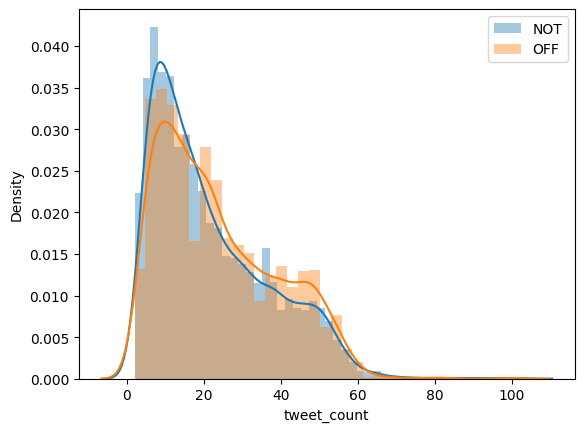

In [107]:
text['tweet_count'] = text['tweet'].str.split().str.len()
print(text.groupby('label')['tweet_count'].mean())
sns.distplot(text[text['label']=='NOT']['tweet_count'], label='NOT')
sns.distplot(text[text['label']=='OFF']['tweet_count'], label='OFF'),
plt.legend()
plt.show()

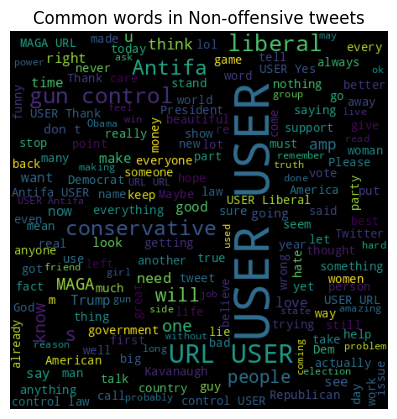

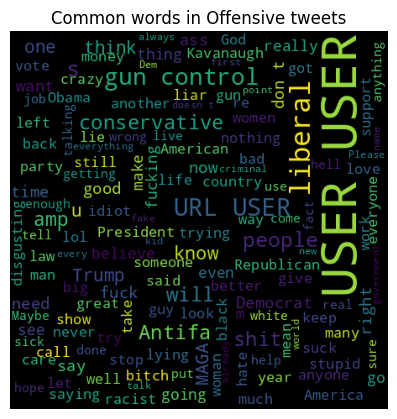

In [108]:
NOT = text[text['label']=='NOT']['tweet'].str.cat(sep=', ')
OFF = text[text['label']=='OFF']['tweet'].str.cat(sep=', ')
word_cloud = WordCloud(width = 450, height = 450, min_font_size = 11, background_color ='black')
word_cloud_NOT = word_cloud.generate(NOT)
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(word_cloud_NOT) 
plt.axis("off") 
plt.title("Common words in Non-offensive tweets")
plt.tight_layout(pad = 0) 
plt.show() 
word_cloud_OFF = word_cloud.generate(OFF)
plt.figure(figsize = (4, 4), facecolor = None) 
plt.imshow(word_cloud_OFF) 
plt.axis("off")
plt.title("Common words in Offensive tweets")
plt.tight_layout(pad = 0) 
plt.show() 

In [109]:
data_test = pd.read_csv('/content/test.csv')

In [110]:
lab_enc = LabelEncoder()
data_test['label_enc'] = lab_enc.fit_transform(data_test['label'])
display(data_test.head())
print(data_test.dtypes)

,id,tweet,label,label_enc
0,15923,#WhoIsQ #WheresTheServer #DumpNike #DECLASFISA...,OFF,1
1,27014,"#ConstitutionDay is revered by Conservatives, ...",NOT,0
2,30530,#FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendmen...,NOT,0
3,13876,#Watching #Boomer getting the news that she is...,NOT,0
4,60133,#NoPasaran: Unity demo to oppose the far-right...,OFF,1


id            int64
tweet        object
label        object
label_enc     int64
dtype: object


In [111]:
x_train = text['tweet']
y_train = text['label_enc']
x_test = data_test['tweet']
y_test = data_test['label_enc']

In [112]:
vector = TfidfVectorizer(strip_accents='ascii')
x_train = vector.fit_transform(x_train)
x_test = vector.transform(x_test)

NAIVE BAYES MODEL (100% train data)

In [113]:
bayes_naive = MultinomialNB()
bayes_naive.fit(x_train, y_train)
print("Accuracy:",bayes_naive.score(x_test, y_test))

Accuracy: 0.7511627906976744


Confusion Matrix:

[[618   2]
 [212  28]]


Classification Report:

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       620
           1       0.93      0.12      0.21       240

    accuracy                           0.75       860
   macro avg       0.84      0.56      0.53       860
weighted avg       0.80      0.75      0.67       860


ROC AUC Score is: 0.5567204301075269


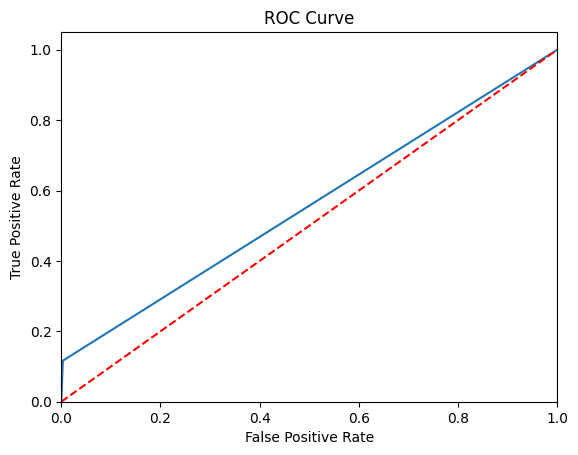

In [114]:
y_prediction = bayes_naive.predict(x_test)
cm_0 = confusion_matrix(y_test, y_prediction)
print("Confusion Matrix:\n")
print(cm_0)
report_class = classification_report(y_test, y_prediction)
print("\n\nClassification Report:\n")
print(report_class)
score_auc = roc_auc_score(y_test, y_prediction)
print("\nROC AUC Score is:",score_auc)

u_prediction_probability = bayes_naive.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, u_prediction_probability)

plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [127]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


NAIVE BAYES MODEL (75% train data)

In [115]:
X = text['tweet']
Y = text['label_enc']

In [116]:
X_train_75, X_test, Y_train_75, Y_test = train_test_split(X, Y, test_size=0.25, random_state=34, stratify=Y)

In [141]:
train_25 = text.sample(frac = 0.25)

In [142]:
train_25.to_csv("/content/drive/My Drive/CE807/Assignment2/1234567/train_25.csv")

In [117]:
vector_75 = TfidfVectorizer(strip_accents='ascii')
X_train_75 = vector_75.fit_transform(X_train_75)
X_test = vector_75.transform(X_test)

In [119]:
nb_75 = MultinomialNB()
nb_75.fit(X_train_75, Y_train_75)
print("Accuracy:",nb_75.score(X_test, Y_test))

Accuracy: 0.701851250405976


NAIVE BAYES MODEL (50% train data)

In [121]:
X_train_50, X_test, Y_train_50, Y_test = train_test_split(X, Y, test_size=0.50, random_state=34, stratify=Y)

In [122]:
vector_50 = TfidfVectorizer(strip_accents='ascii')
X_train_50 = vector_50.fit_transform(X_train_50)
X_test = vector_50.transform(X_test)

In [123]:
nb_50 = MultinomialNB()
nb_50.fit(X_train_50, Y_train_50)
print("Accuracy:",nb_50.score(X_test, Y_test))

Accuracy: 0.6938444047425695


NAIVE BAYES MODEL (25% train data)

In [124]:
X_train_25, X_test, Y_train_25, Y_test = train_test_split(X, Y, test_size=0.75, random_state=34, stratify=Y)

In [125]:
vector_25 = TfidfVectorizer(strip_accents='ascii')
X_train_25 = vector_25.fit_transform(X_train_25)
X_test = vector_25.transform(X_test)

In [126]:
nb_25 = MultinomialNB()
nb_25.fit(X_train_25, Y_train_25)
print("Accuracy:",nb_25.score(X_test, Y_test))

Accuracy: 0.6858689767190038


LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression
LR_model_tweet = LogisticRegression()

In [59]:
LR_model_tweet.fit(x_train,y_train)

LogisticRegression()

In [60]:
LR_tweet_prediction = LR_model_tweet.predict(x_test)
accuracy_score(y_test,LR_tweet_prediction)


0.7953488372093023

In [62]:
cm_LR = confusion_matrix(y_test,LR_tweet_prediction)
print(cm_LR)
cr_LR = classification_report(y_test,LR_tweet_prediction)
print(cr_LR)

[[604  16]
 [160  80]]
              precision    recall  f1-score   support

           0       0.79      0.97      0.87       620
           1       0.83      0.33      0.48       240

    accuracy                           0.80       860
   macro avg       0.81      0.65      0.67       860
weighted avg       0.80      0.80      0.76       860



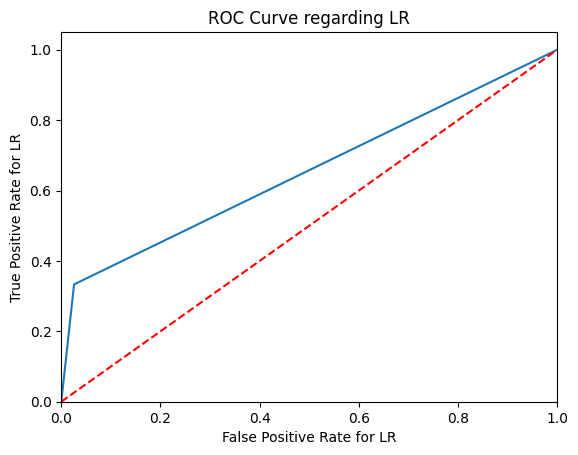

In [65]:
u_prediction__LR = LR_model_tweet.predict(x_test)

false_positive_rate_LR, true_positive_rate_LR, thresholds_LR = roc_curve(y_test, u_prediction__LR)

plt.plot(false_positive_rate_LR, true_positive_rate_LR)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate for LR')
plt.ylabel('True Positive Rate for LR')
plt.title('ROC Curve regarding LR')
plt.show()